In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stat
import pylab

In [48]:
df=pd.read_excel('flight_price.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [3]:
#Q1
df.shape

(10683, 11)

In [5]:
#Q2
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

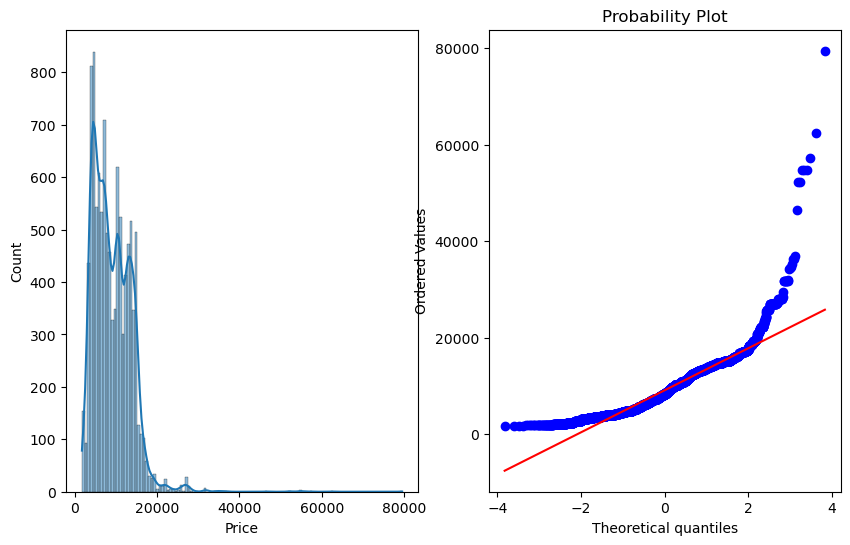

In [7]:
plot_data(df,'Price')

In [9]:
#not a normal Distribution.It is a right skewed distributuion. 

In [10]:
#Q3
np.min(df["Price"])

1759

In [12]:

np.max(df["Price"])

79512

In [14]:
range_price=np.max(df["Price"])-np.min(df["Price"])
range_price

77753

<AxesSubplot: xlabel='Airline', ylabel='Price'>

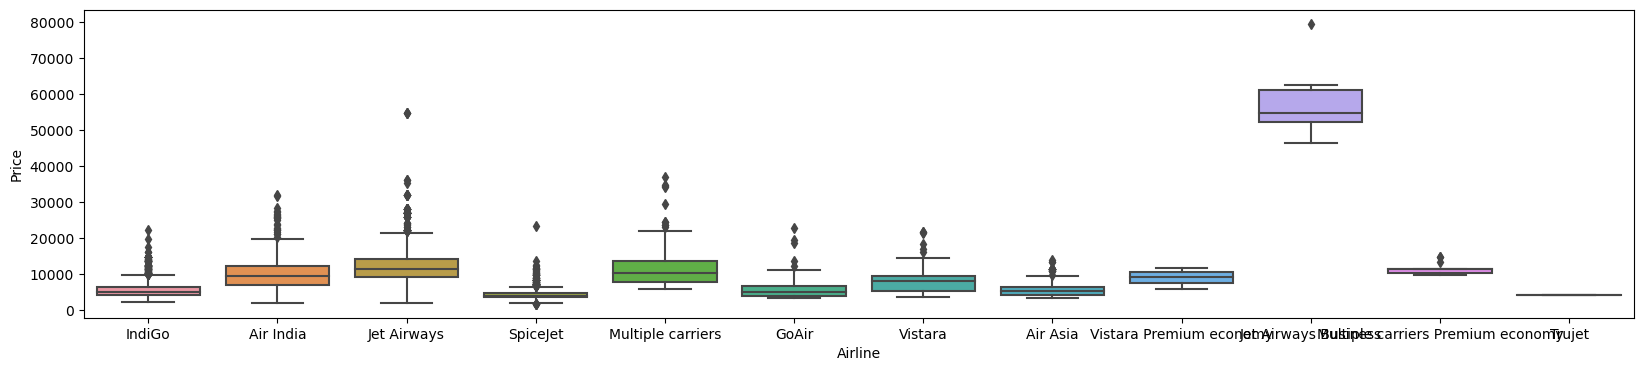

In [26]:
#q4
plt.figure(figsize=(20,4))
sns.boxplot(data=df,x=df["Airline"],y=df['Price'])

<AxesSubplot: >

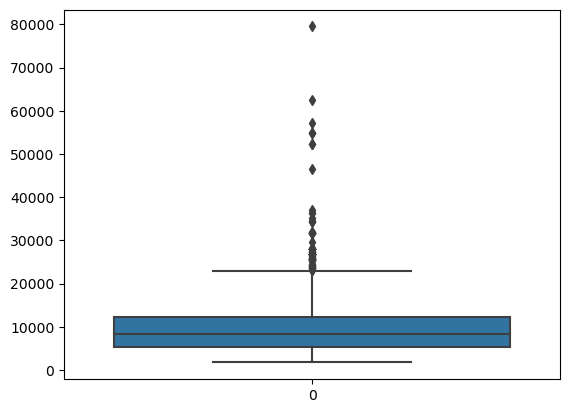

In [3]:
#q5
sns.boxplot(df['Price'])

In [4]:
#yes there are outliers

In [5]:
#q6

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [50]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


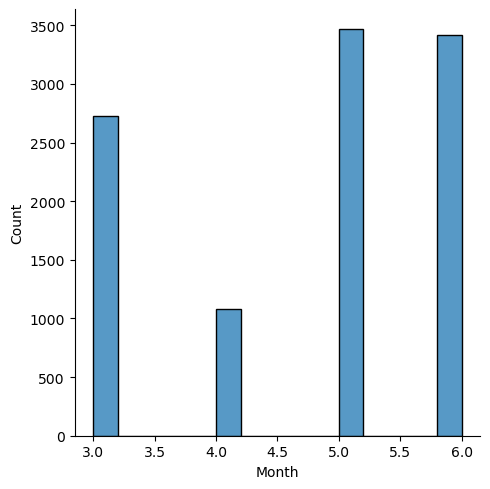

In [16]:
sns.displot(x=df["Month"])

In [17]:
#we can the most flights were booked during the 5th Month of the Year

In [11]:
#Q7
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


<AxesSubplot: xlabel='Destination', ylabel='Price'>

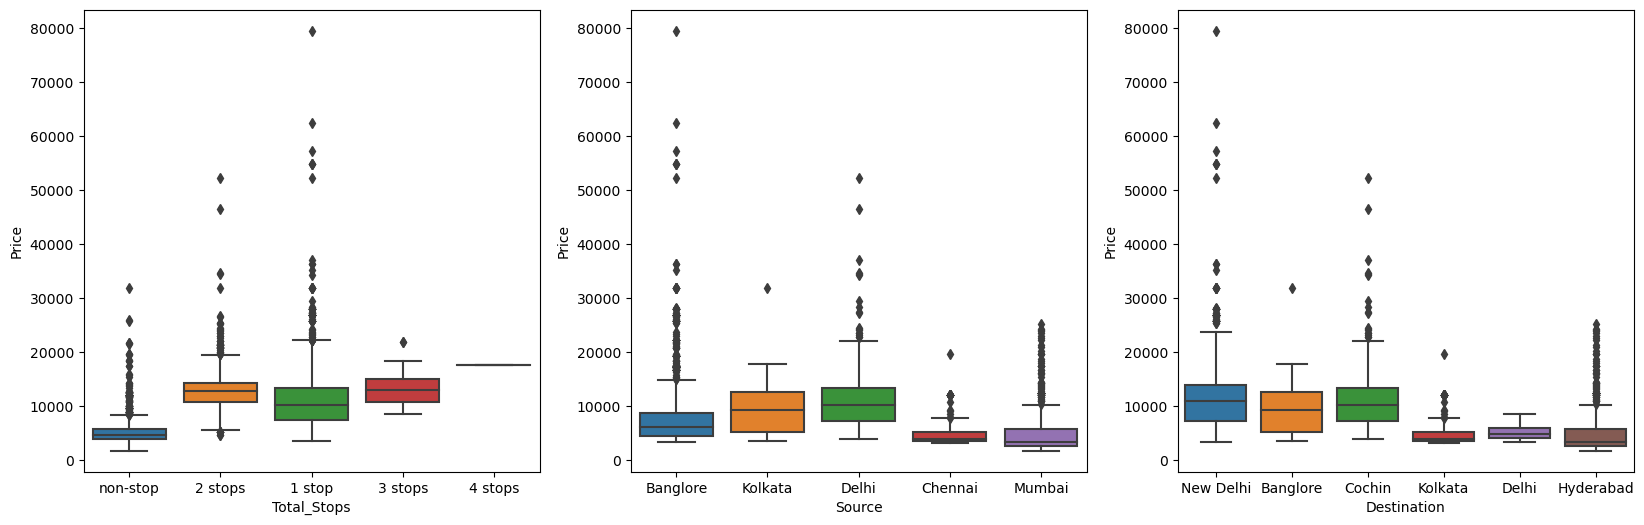

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='Total_Stops',y='Price')
plt.subplot(1,3,2)
sns.boxplot(data=df,x='Source',y='Price')
plt.subplot(1,3,3)
sns.boxplot(data=df,x='Destination',y='Price')

## Insights
1. 4 Stops has the highest avg Price and least number flights.
2. 1 Stops has the largest range of Prices.
3. from Bangalore has the highest Range in terms of Prices  
4. To and From Delhi has highest avg cost. 

In [28]:
#Q8
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [30]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [56]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
encoder=LabelEncoder()

In [55]:
df['Airline']=encoder.fit_transform(df['Airline'])

In [57]:
df['Source']=encoder.fit_transform(df['Source'])

In [58]:
df['Destination']=encoder.fit_transform(df['Destination'])

In [60]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,2019
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019


In [72]:

df.corr()

,Airline,Source,Destination,Total_Stops,Price,Date,Month
Airline,1.000000,-0.013401,0.018479,-0.199411,-0.039520,0.026238,0.024643
Source,-0.013401,1.000000,-0.592574,0.192840,0.015998,0.004898,0.183268
Destination,0.018479,-0.592574,1.000000,-0.295481,-0.071112,-0.040998,-0.364686
Total_Stops,-0.199411,0.192840,-0.295481,1.000000,0.603883,-0.009472,0.054389
Price,-0.039520,0.015998,-0.071112,0.603883,1.000000,-0.153738,-0.103651
Date,0.026238,0.004898,-0.040998,-0.009472,-0.153738,1.000000,-0.038378
Month,0.024643,0.183268,-0.364686,0.054389,-0.103651,-0.038378,1.000000


<AxesSubplot: >

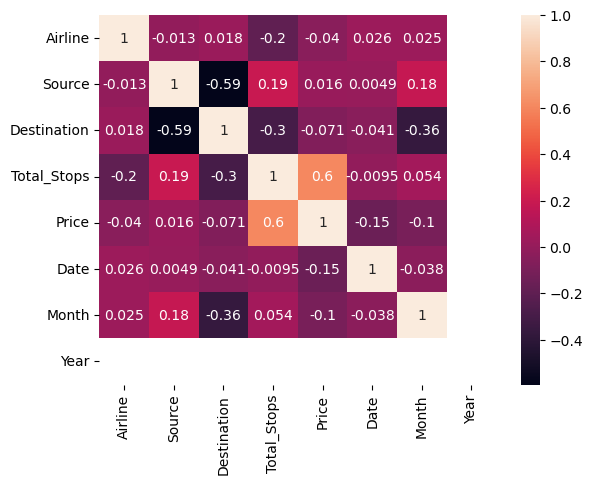

In [68]:
sns.heatmap(data=df.corr(),annot=True)

In [73]:
#Q2

In [110]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [75]:
df.shape

(10841, 13)

In [76]:
#Q10

<AxesSubplot: xlabel='Category', ylabel='Rating'>

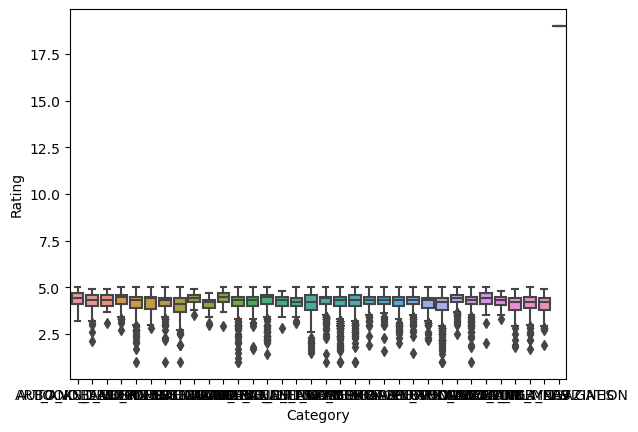

In [78]:
sns.boxplot(data=df,x='Category',y='Rating')

In [79]:
#Q11
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [80]:
#Missing Data may hinder my Predictive Model by skewing the results.

In [81]:
#q12

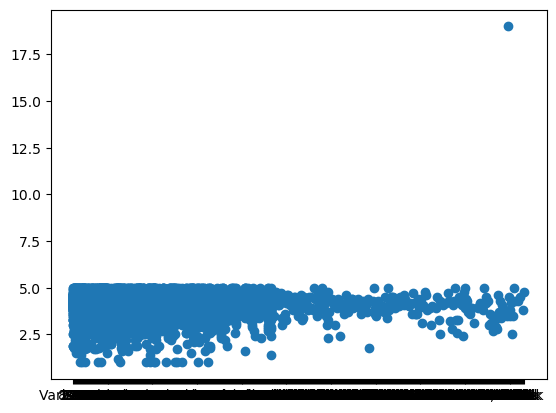

In [84]:
plt.scatter(df['Size'],df['Rating'])

In [89]:
#Q13
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [111]:
df['Type'].unique()
df['Type_en']=df['Type'].map({'Free':1, 'Paid':2, np.nan:0, '0':0})


In [112]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [115]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df[cols]=df[cols].str.replace(item,'')

In [126]:

df['Price']=df['Price'].astype(float)

<AxesSubplot: xlabel='Type', ylabel='count'>

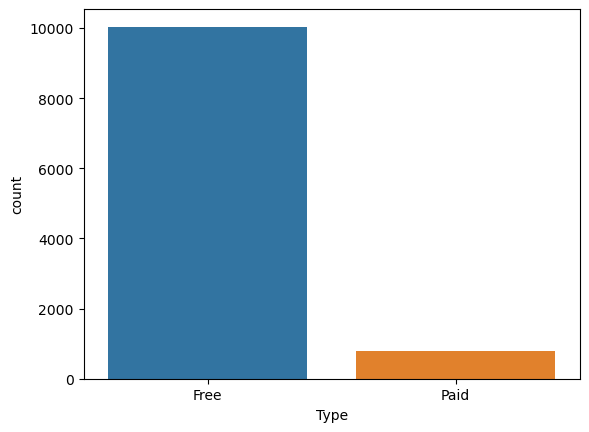

In [137]:
sns.countplot(x=df['Type'])

In [129]:
#Free app cost nothing and Paid app has a price.

In [ ]:
#q14

In [176]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_en
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,0.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,0.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,0.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,0.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,0.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [138]:
df['Installs']=df['Installs'].astype(float)

In [175]:
df['Installs']=np.sort(df['Installs'])

In [180]:
l=np.array(df.tail(10)['App'])

In [181]:
print(l)

['payermonstationnement.fr' 'FR Tides' 'Chemin (fr)' 'FR Calculator'
 'FR Forms' 'Sya9a Maroc - FR' 'Fr. Mike Schmitz Audio Teachings'
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']


In [194]:
#Q15
df.groupby('Category')['Installs'].sum().sort_values()

Category
EDUCATION              1.280000e+04
ENTERTAINMENT          1.490000e+04
PARENTING              2.056000e+07
ART_AND_DESIGN         3.273003e+07
BEAUTY                 1.206002e+08
HOUSE_AND_HOME         2.136428e+08
FOOD_AND_DRINK         2.257780e+08
DATING                 6.040682e+08
LIBRARIES_AND_DEMO     6.052240e+08
EVENTS                 7.302544e+08
COMICS                 1.027850e+09
SHOPPING               1.488327e+09
HEALTH_AND_FITNESS     1.693879e+09
AUTO_AND_VEHICLES      1.885170e+09
TRAVEL_AND_LOCAL       1.929210e+09
VIDEO_PLAYERS          2.040450e+09
WEATHER                2.346110e+09
MAPS_AND_NAVIGATION    2.932430e+09
PHOTOGRAPHY            3.059720e+09
PRODUCTIVITY           4.196550e+09
NEWS_AND_MAGAZINES     4.261920e+09
MEDICAL                4.816321e+09
SOCIAL                 6.191060e+09
FINANCE                6.437433e+09
COMMUNICATION          6.505811e+09
PERSONALIZATION        6.897260e+09
BOOKS_AND_REFERENCE    7.966380e+09
SPORTS             

<AxesSubplot: xlabel='Category', ylabel='Installs'>

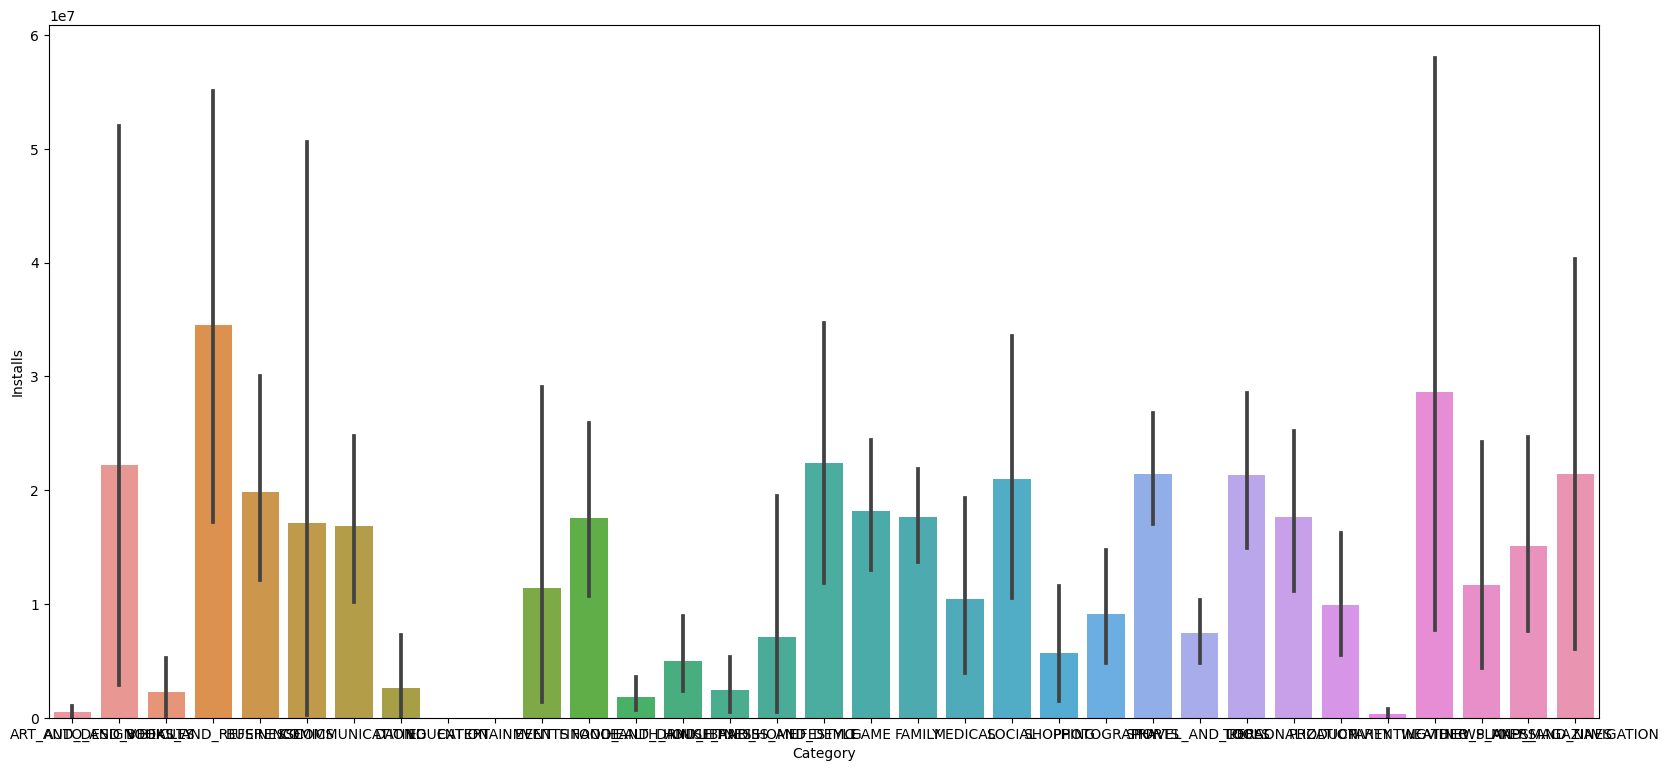

In [188]:
plt.figure(figsize=(20,9))
sns.barplot(data=df,x='Category',y='Installs')

In [195]:
#Q16

<AxesSubplot: xlabel='Category', ylabel='Installs'>

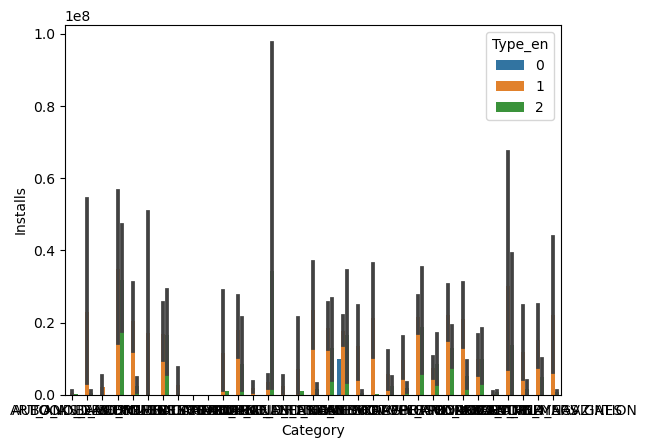

In [196]:
# The Company can make recommendations on the Below data as to Which category would be best fit for app developers
sns.barplot(data=df,x='Category',y='Installs',hue='Type_en')

In [197]:
#q17

In [198]:
df_copy=df

In [199]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [200]:
df=df_copy

<AxesSubplot: xlabel='Month', ylabel='Installs'>

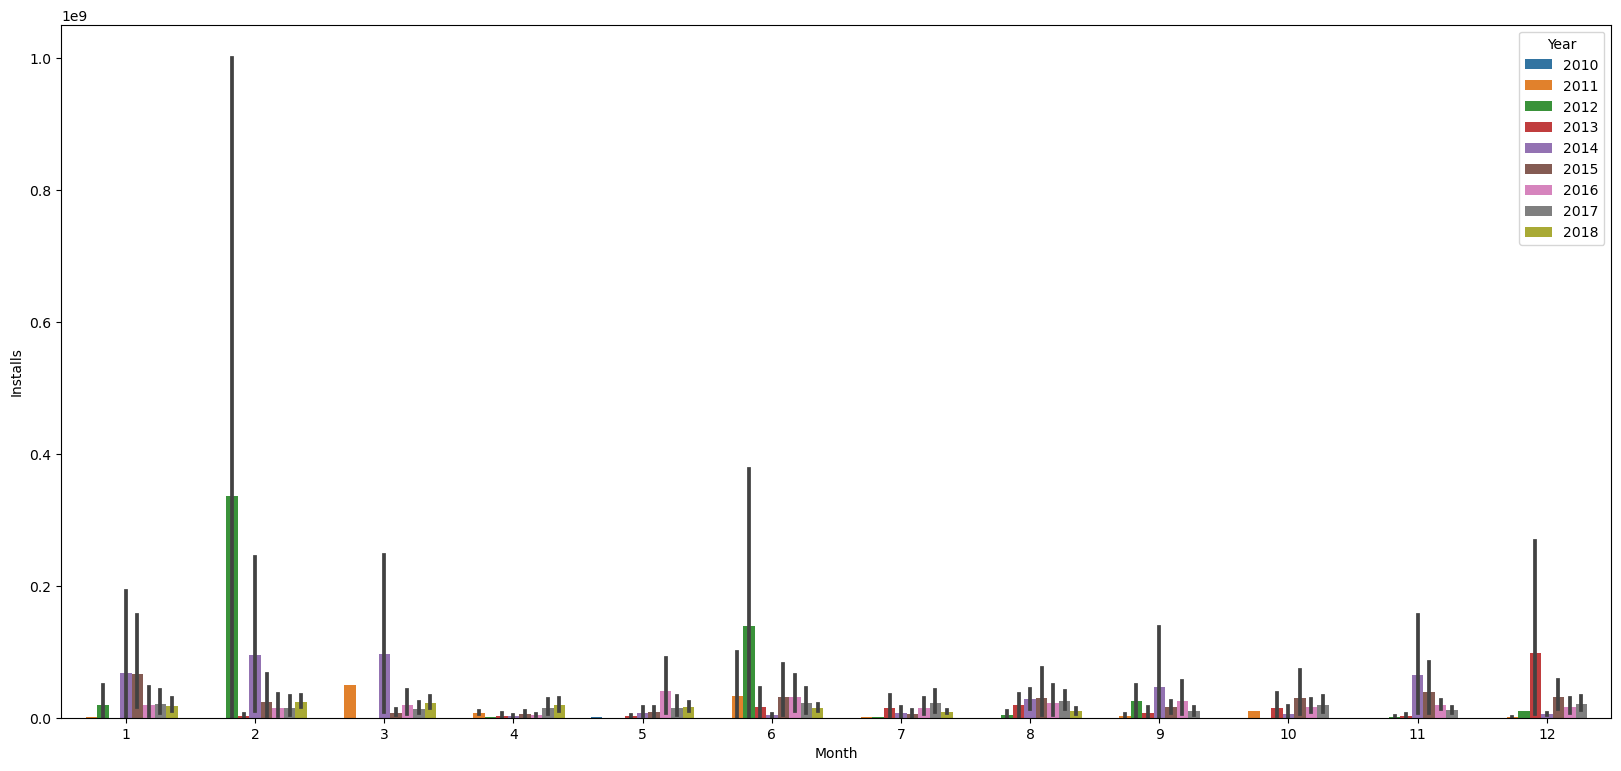

In [206]:
plt.figure(figsize=(20,9))
sns.barplot(data=df,x='Month',y='Installs',hue='Year')

In [207]:
#We can use the above graph to find the best time o launch an app